In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import numpy as np
from sklearn.decomposition import PCA
from numpy.random import rand

In [14]:
patients = pd.read_csv('../Data/standardized_patients.csv', index_col=0)
patients.shape

(153884, 17)

In [18]:
males = patients[patients['sex'] > 0]
males.drop(columns=['menopause','HRT'], axis=1, inplace=True)

/Users/erennio/.local/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
males.shape

(79177, 15)

In [20]:
y = males['Class'].values

In [21]:
tsne = TSNE(n_components=2, random_state=0, verbose=1).fit_transform(males)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 79177 samples in 4.322s...
[t-SNE] Computed neighbors for 79177 samples in 301.245s...
[t-SNE] Computed conditional probabilities for sample 1000 / 79177
[t-SNE] Computed conditional probabilities for sample 2000 / 79177
[t-SNE] Computed conditional probabilities for sample 3000 / 79177
[t-SNE] Computed conditional probabilities for sample 4000 / 79177
[t-SNE] Computed conditional probabilities for sample 5000 / 79177
[t-SNE] Computed conditional probabilities for sample 6000 / 79177
[t-SNE] Computed conditional probabilities for sample 7000 / 79177
[t-SNE] Computed conditional probabilities for sample 8000 / 79177
[t-SNE] Computed conditional probabilities for sample 9000 / 79177
[t-SNE] Computed conditional probabilities for sample 10000 / 79177
[t-SNE] Computed conditional probabilities for sample 11000 / 79177
[t-SNE] Computed conditional probabilities for sample 12000 / 79177
[t-SNE] Computed conditional probabilities for s

In [22]:
tsne

array([[-22.302887  ,  27.119452  ],
       [ 14.711477  ,  -0.29704213],
       [  9.309354  ,  23.805246  ],
       ...,
       [  0.9314454 ,  -7.360641  ],
       [ -1.1749011 ,   6.0404525 ],
       [ 27.667877  ,  12.347374  ]], dtype=float32)

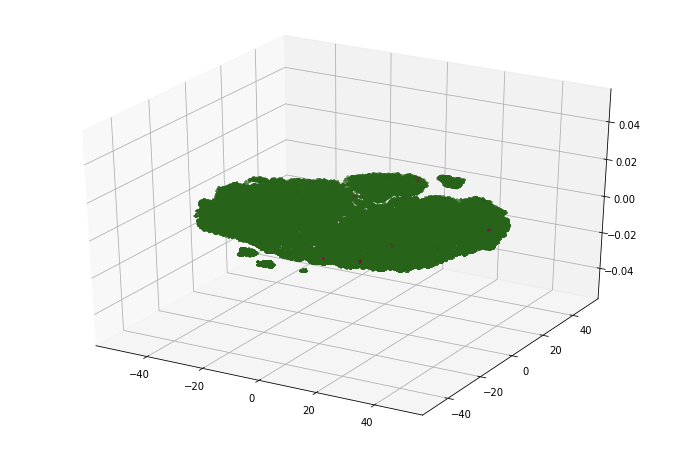

In [23]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne), c=y, cmap='PiYG_r', marker='+')
plt.show()